In [8]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Load test dataset
df_test = pd.read_parquet("../data/final/test_data.parquet")

# Drop classification target to avoid leakage
df_test = df_test.drop(columns=['DepDel15'])

# Extract features and target
X_test = df_test.drop(columns=['DepDelayMinutes'])
y_test = df_test['DepDelayMinutes'].values.ravel()

In [12]:
# Regression models
regression_models = {
    "Linear Regression": "../models/linear_regression/linear_regression.pkl",
    "SGD Regression": "../models/sgd_regressor/sgd_regressor.pkl",
    "HistGradient Regression": "../models/histgradientboosting_regression/histgradientboosting_regression.pkl"
}

In [13]:
# Storage for results
regression_results = []
model_predictions = {}

# Load models and evaluate
for model_name, file in regression_models.items():
    with open(file, "rb") as f:
        model = pickle.load(f)
    
    y_pred = model.predict(X_test)
    model_predictions[model_name] = y_pred

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regression_results.append({
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Convert to DataFrame and display
df_regression = pd.DataFrame(regression_results)

In [14]:
df_regression

,Model,RMSE,MAE,R²
0,Linear Regression,73.977459,37.685911,0.033632
1,SGD Regression,74.025841,37.692941,0.032368
2,HistGradient Regression,73.007994,36.926473,0.058794


<Figure size 1000x600 with 0 Axes>

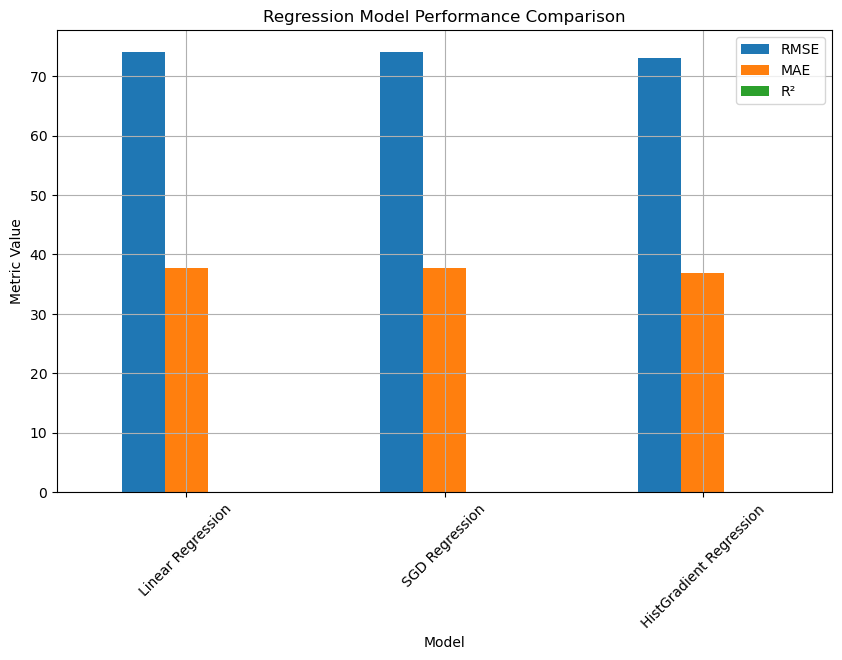

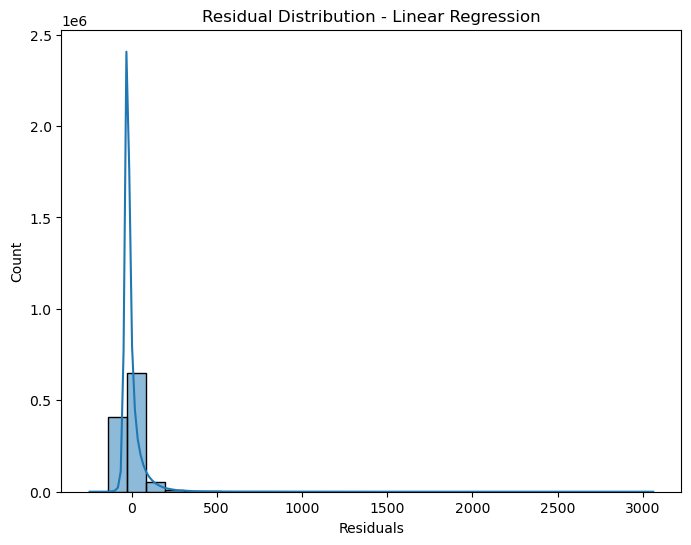

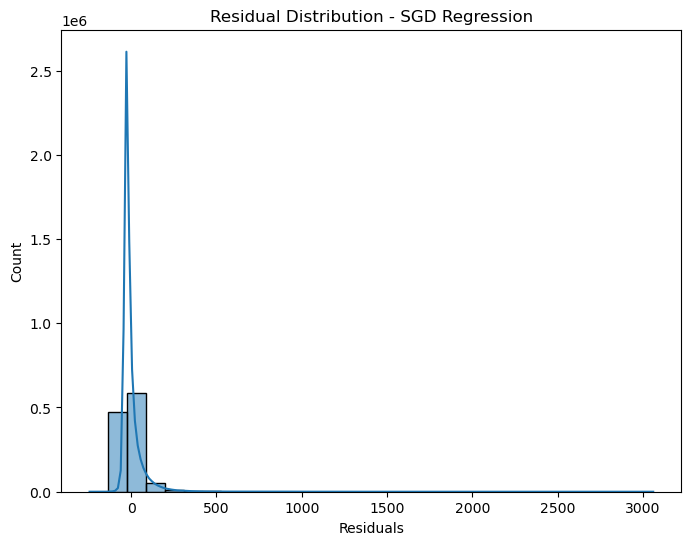

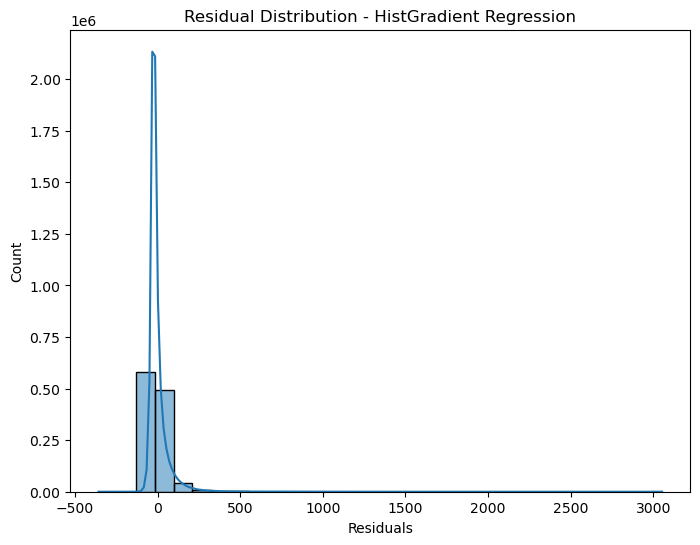

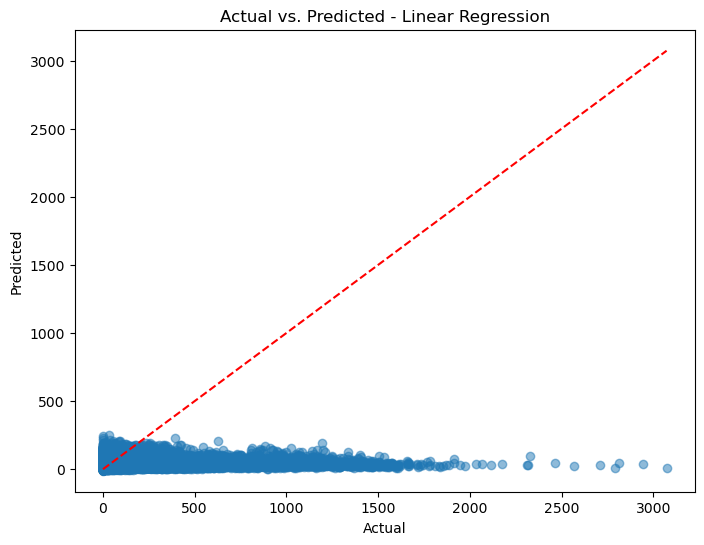

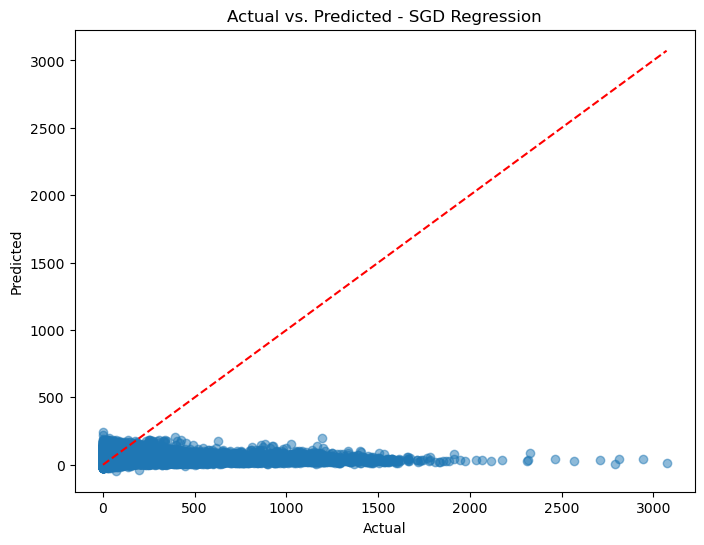

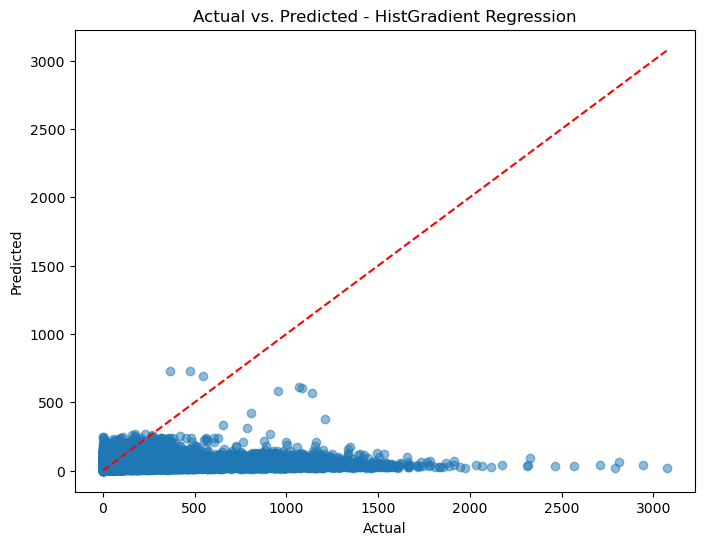

In [15]:
# --- Visualization ---

# 1. Regression Performance Bar Plot
plt.figure(figsize=(10, 6))
df_regression.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Regression Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2. Residual Plots
for model_name in regression_models.keys():
    plt.figure(figsize=(8, 6))
    sns.histplot(y_test - model_predictions[model_name], bins=30, kde=True)
    plt.title(f"Residual Distribution - {model_name}")
    plt.xlabel("Residuals")
    plt.show()

# 3. Actual vs Predicted Scatter Plot
for model_name in regression_models.keys():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, model_predictions[model_name], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(f"Actual vs. Predicted - {model_name}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()